# Life Expectancy and GDP Capstone Project for Data Visualizations

### Overview of the Data
All data was pulled from the World Bank Data Bank website (https://databank.worldbank.org/home.aspx)  Three reports were created and downloaded.  This ocurred on July 11, 2024.  
**Variables:**  
The data captured included Gross Domestic Product per capita (in current USD),
Life Expectancy, and Adolescent Fertility Rate (the number of births to girls aged 15 to 19 out of 1000 girls in that age range).  
**Time Frame:**  
Data was pulled, where available, for the years 2004 to 2023  
**Countries:**  
The United States of America, Germany, France, Italy, Greece, Spain, Mexico, Honduras, Panama, Peru, Chile, Dominican Republic

In [ ]:

!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [2]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

### Set up the Project Data Files

In [ ]:
## I will Import some Common Libraries that I likely will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [ ]:
## Read in the GDP Data
df_gdp = pd.read_csv("gdp_Data.csv")
print(df_gdp.head())

                    Series Name     Series Code   Country Name Country Code  \
0  GDP per capita (current US$)  NY.GDP.PCAP.CD  United States          USA   
1  GDP per capita (current US$)  NY.GDP.PCAP.CD        Germany          DEU   
2  GDP per capita (current US$)  NY.GDP.PCAP.CD         France          FRA   
3  GDP per capita (current US$)  NY.GDP.PCAP.CD          Italy          ITA   
4  GDP per capita (current US$)  NY.GDP.PCAP.CD         Greece          GRC   

   2004 [YR2004]  2005 [YR2005]  2006 [YR2006]  2007 [YR2007]  2008 [YR2008]  \
0   41724.641198   44123.399647   46301.987649   48050.227412   48570.059427   
1   34106.658122   34520.239649   36353.880334   41640.080870   45612.710622   
2   33797.162442   34768.175904   36470.212840   41557.623565   45515.961753   
3   31317.200794   32055.092076   33529.726601   37870.747507   40944.912419   
4   21995.477944   22560.147294   24821.936745   28863.973289   32127.983194   

   2009 [YR2009]  ...  2014 [YR2014]  2015 [

In [ ]:
## Read in the Adolescent fertility rate data
df_adol = pd.read_csv("adolescent_Data.csv")
print(df_adol.head())

                                         Series Name  Series Code  \
0  Adolescent fertility rate (births per 1,000 wo...  SP.ADO.TFRT   
1  Adolescent fertility rate (births per 1,000 wo...  SP.ADO.TFRT   
2  Adolescent fertility rate (births per 1,000 wo...  SP.ADO.TFRT   
3  Adolescent fertility rate (births per 1,000 wo...  SP.ADO.TFRT   
4  Adolescent fertility rate (births per 1,000 wo...  SP.ADO.TFRT   

    Country Name Country Code  2004 [YR2004]  2005 [YR2005]  2006 [YR2006]  \
0  United States          USA         39.658         38.963         39.756   
1        Germany          DEU         11.329         10.954         10.721   
2         France          FRA         11.054         10.938         10.966   
3          Italy          ITA          7.251          7.017          6.836   
4         Greece          GRC         10.889         10.287         10.742   

   2007 [YR2007]  2008 [YR2008]  2009 [YR2009]  ...  2014 [YR2014]  \
0         40.380         39.629         37.647

In [ ]:
## Read in the life expectancy data
df_life = pd.read_csv("life_expectancy_Data.csv")
print(df_life.head())

                               Series Name     Series Code   Country Name  \
0  Life expectancy at birth, total (years)  SP.DYN.LE00.IN  United States   
1  Life expectancy at birth, total (years)  SP.DYN.LE00.IN        Germany   
2  Life expectancy at birth, total (years)  SP.DYN.LE00.IN         France   
3  Life expectancy at birth, total (years)  SP.DYN.LE00.IN          Italy   
4  Life expectancy at birth, total (years)  SP.DYN.LE00.IN         Greece   

  Country Code  2004 [YR2004]  2005 [YR2005]  2006 [YR2006]  2007 [YR2007]  \
0          USA      77.487805      77.487805      77.687805      77.987805   
1          DEU      78.680488      78.931707      79.131707      79.534146   
2          FRA      80.163415      80.163415      80.812195      81.112195   
3          ITA      80.780488      80.782927      81.282927      81.434146   
4          GRC      79.039024      79.239024      79.439024      79.439024   

   2008 [YR2008]  2009 [YR2009]  ...  2014 [YR2014]  2015 [YR2015]  

In [ ]:
## The first 2 columns in the three DataFrames are not necessary and can be dropped
drop_these = ["Series Name", "Series Code"]
df_gdp.drop(columns = drop_these, inplace = True)
df_adol.drop(columns = drop_these, inplace = True)
df_life.drop(columns = drop_these, inplace = True)

## Let's look at just one to verify it worked
print(df_life)

          Country Name Country Code  2004 [YR2004]  2005 [YR2005]  \
0        United States          USA      77.487805      77.487805   
1              Germany          DEU      78.680488      78.931707   
2               France          FRA      80.163415      80.163415   
3                Italy          ITA      80.780488      80.782927   
4               Greece          GRC      79.039024      79.239024   
5                Spain          ESP      79.870732      80.170732   
6               Mexico          MEX      74.372000      74.376000   
7               Panama          PAN      75.544000      75.829000   
8             Honduras          HND      69.796000      70.104000   
9                 Peru          PER      72.668000      72.986000   
10               Chile          CHL      77.616000      78.016000   
11  Dominican Republic          DOM      70.331000      70.875000   
12                 NaN          NaN            NaN            NaN   
13                 NaN          Na

In [ ]:
## It looks like we have 5 rows of NaN.  This might be the case for all DataFrames.  I will drop these rows.
df_gdp = df_gdp.dropna(how="all")
df_gdp = df_gdp.reset_index(drop=True)
df_adol = df_adol.dropna(how="all")
df_adol = df_adol.reset_index(drop=True)
df_life = df_life.dropna(how="all")
df_life = df_life.reset_index(drop=True)

In [ ]:
## The column names are not normal Panda format.  I'll change them for all DataFrames
new_columns = ["country", "code", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]
df_gdp.columns = new_columns
df_adol.columns = new_columns
df_life.columns = new_columns

## Another peak to test
print(df_life.head())

         country code       2004       2005       2006       2007       2008  \
0  United States  USA  77.487805  77.487805  77.687805  77.987805  78.039024   
1        Germany  DEU  78.680488  78.931707  79.131707  79.534146  79.736585   
2         France  FRA  80.163415  80.163415  80.812195  81.112195  81.214634   
3          Italy  ITA  80.780488  80.782927  81.282927  81.434146  81.485366   
4         Greece  GRC  79.039024  79.239024  79.439024  79.439024  79.939024   

        2009       2010       2011  ...       2014       2015       2016  \
0  78.390244  78.541463  78.641463  ...  78.841463  78.690244  78.539024   
1  79.836585  79.987805  80.436585  ...  81.090244  80.641463  80.990244   
2  81.414634  81.663415  82.114634  ...  82.719512  82.321951  82.573171   
3  81.636585  82.036585  82.187805  ...  83.090244  82.543902  83.243902   
4  80.187805  80.387805  80.731707  ...  81.385366  81.036585  81.387805   

        2017       2018       2019       2020       2021      

### Converting the DataFrames to Long Format and Merging Them

In [ ]:
## To make analysis easier, I will convert my 3 DataFrames from wide format to long format
df_gdp_lf = pd.melt(df_gdp,
                   id_vars = ["country", "code"],
                   var_name = "year",
                   value_name = "gdp")

## I will check to see if my new melted DataFrame looks correct
print(df_gdp_lf.head())
print(len(df_gdp_lf))
print(df_gdp_lf["country"].value_counts())
print(df_gdp_lf["code"].value_counts())
print(df_gdp_lf["year"].value_counts())

         country code  year           gdp
0  United States  USA  2004  41724.641198
1        Germany  DEU  2004  34106.658122
2         France  FRA  2004  33797.162442
3          Italy  ITA  2004  31317.200794
4         Greece  GRC  2004  21995.477944
240
country
United States         20
Germany               20
France                20
Italy                 20
Greece                20
Spain                 20
Mexico                20
Panama                20
Honduras              20
Chile                 20
Peru                  20
Dominican Republic    20
Name: count, dtype: int64
code
USA    20
DEU    20
FRA    20
ITA    20
GRC    20
ESP    20
MEX    20
PAN    20
HND    20
CHL    20
PER    20
DOM    20
Name: count, dtype: int64
year
2004    12
2005    12
2022    12
2021    12
2020    12
2019    12
2018    12
2017    12
2016    12
2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2006    12
2023    12
Name: count, dtype: int64


In [ ]:
## That worked, so now I will do the same for the other two DataFrames
df_adol_lf = pd.melt(df_adol,
                    id_vars = ["country", "code"],
                    var_name = "year",
                    value_name = "fert_rate")
df_life_lf = pd.melt(df_life,
                    id_vars = ["country", "code"],
                    var_name = "year",
                    value_name = "life_exp")

## I'll check them both
print(df_adol_lf.head())
print(len(df_adol_lf))
print()
print(df_life_lf.head())
print(len(df_life_lf))

         country code  year  fert_rate
0  United States  USA  2004     39.658
1        Germany  DEU  2004     11.329
2         France  FRA  2004     11.054
3          Italy  ITA  2004      7.251
4         Greece  GRC  2004     10.889
240

         country code  year   life_exp
0  United States  USA  2004  77.487805
1        Germany  DEU  2004  78.680488
2         France  FRA  2004  80.163415
3          Italy  ITA  2004  80.780488
4         Greece  GRC  2004  79.039024
240


In [ ]:
## The three DataFrames are in Long Format now.  I can merge them into one DataFrame now.
df_combined = df_gdp_lf.merge(df_adol_lf, on=["country", "code", "year"])
df_combined = df_combined.merge(df_life_lf, on=["country", "code", "year"])

## Of course we want to take a look and make sure it worked
print(df_combined.head())
print(len(df_combined))

         country code  year           gdp  fert_rate   life_exp
0  United States  USA  2004  41724.641198     39.658  77.487805
1        Germany  DEU  2004  34106.658122     11.329  78.680488
2         France  FRA  2004  33797.162442     11.054  80.163415
3          Italy  ITA  2004  31317.200794      7.251  80.780488
4         Greece  GRC  2004  21995.477944     10.889  79.039024
240


In [ ]:
## The decimal places are tedious and unneccesary.  I will trim them.
df_combined["gdp"] = df_combined["gdp"].round(0)
df_combined["fert_rate"] = df_combined["fert_rate"].round(1)
df_combined["life_exp"] = df_combined["life_exp"].round(1)

print(df_combined.head())

         country code  year      gdp  fert_rate  life_exp
0  United States  USA  2004  41725.0       39.7      77.5
1        Germany  DEU  2004  34107.0       11.3      78.7
2         France  FRA  2004  33797.0       11.1      80.2
3          Italy  ITA  2004  31317.0        7.3      80.8
4         Greece  GRC  2004  21995.0       10.9      79.0


### Visualizing our Primary Variables as Histograms

C:\Users\SRB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


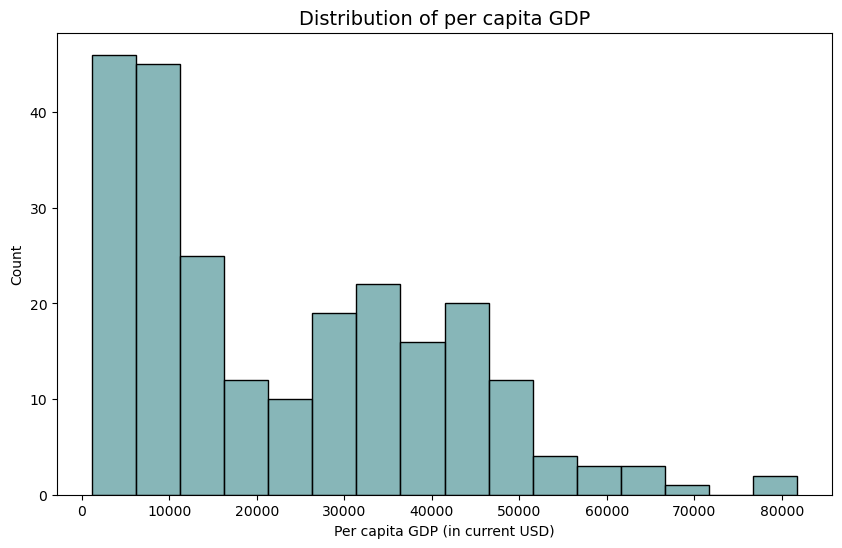

<Figure size 640x480 with 0 Axes>

In [ ]:
## I will look at the distribution of my 3 primary variables using histograms
plt.figure(figsize=(10, 6))
sns.histplot(df_combined["gdp"], bins=16, color="CadetBlue")
plt.title("Distribution of per capita GDP", size=14,)
plt.xlabel("Per capita GDP (in current USD)")
plt.show()
plt.clf()


C:\Users\SRB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


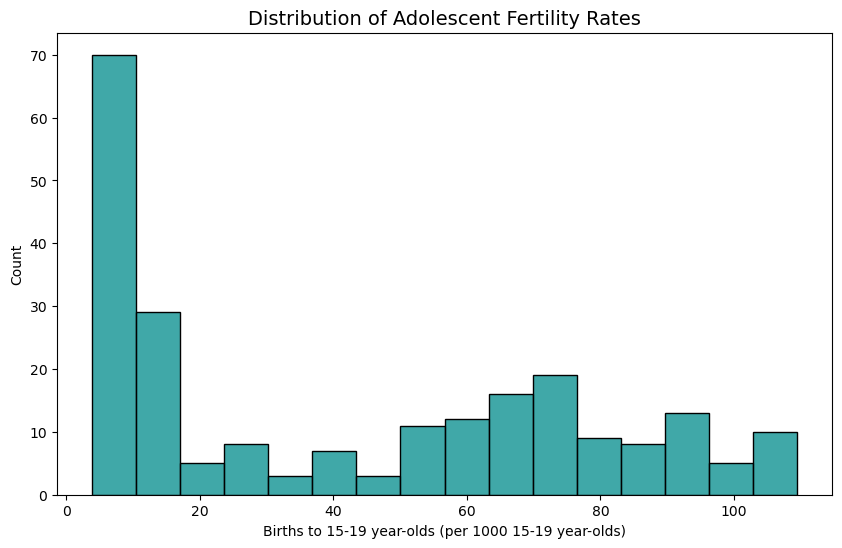

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_combined["fert_rate"], bins=16, color="DarkCyan")
plt.title("Distribution of Adolescent Fertility Rates", size=14)
plt.xlabel("Births to 15-19 year-olds (per 1000 15-19 year-olds)")
plt.show()
plt.clf()

C:\Users\SRB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


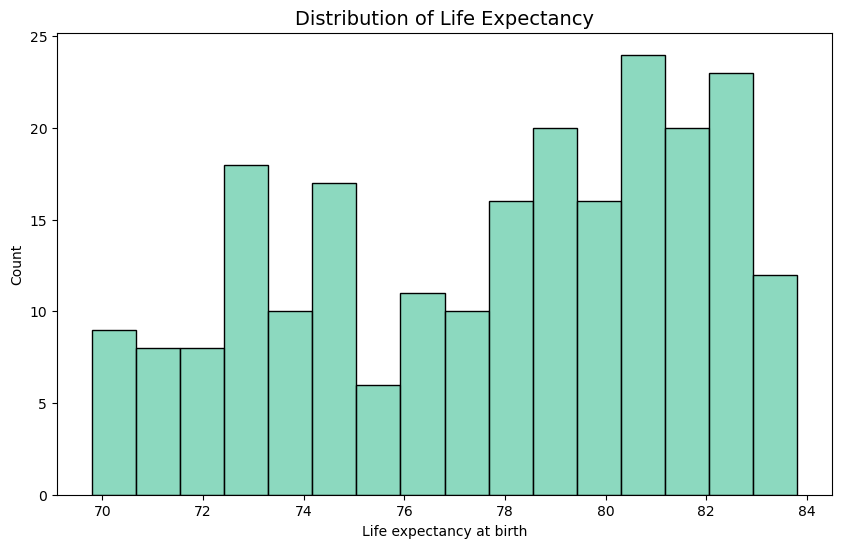

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_combined["life_exp"], bins=16, color="MediumAquaMarine")
plt.title("Distribution of Life Expectancy", size=14)
plt.xlabel("Life expectancy at birth")
plt.show()
plt.clf()

### Visualizing the Change over Time of Our Variables

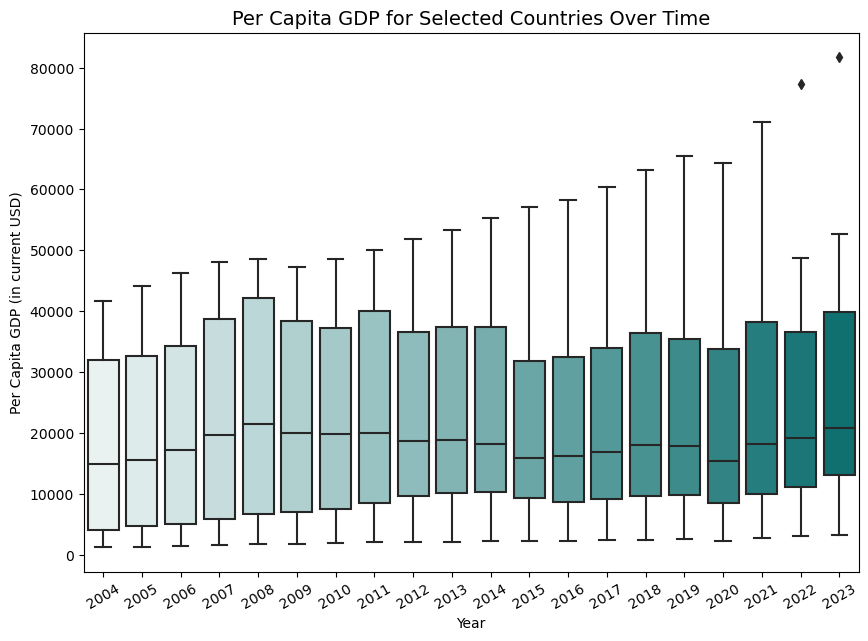

<Figure size 640x480 with 0 Axes>

In [ ]:
## I will try to visualize the change over time with a series of box plots
plt.figure(figsize=(10, 7))
color_map = sns.light_palette("teal", n_colors=len(df_combined['year'].unique()))
sns.boxplot(x="year", y="gdp", data = df_combined, palette=color_map)
plt.title("Per Capita GDP for Selected Countries Over Time", size=14)
plt.ylabel("Per Capita GDP (in current USD)")
plt.xlabel("Year")
plt.xticks(rotation=30)
plt.show()
plt.clf()

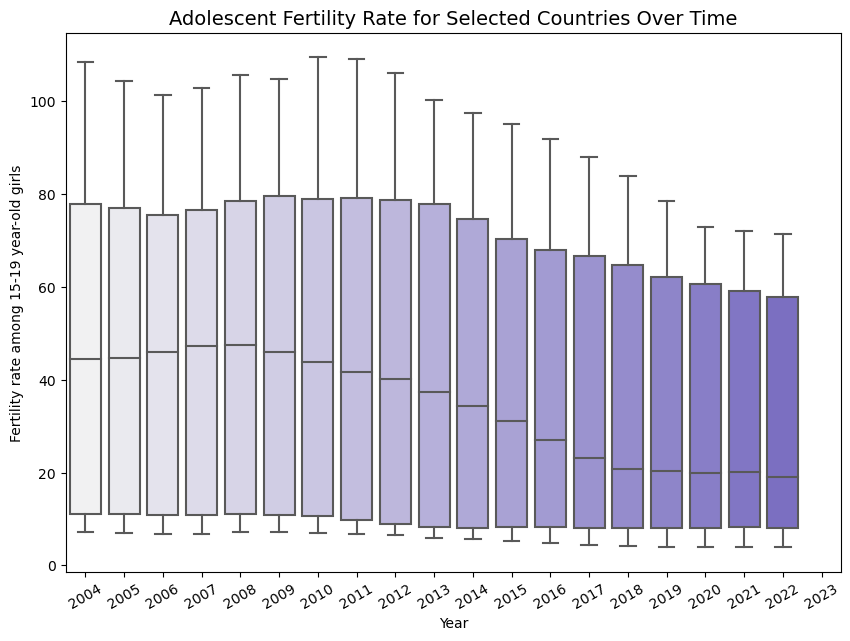

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 7))
color_map = sns.light_palette("slateblue", n_colors=len(df_combined['year'].unique()))
sns.boxplot(x="year", y="fert_rate", data = df_combined, palette=color_map)
plt.title("Adolescent Fertility Rate for Selected Countries Over Time", size=14)
plt.xlabel("Year")
plt.xticks(rotation=30)
plt.ylabel("Fertility rate among 15-19 year-old girls")
plt.show()
plt.clf()

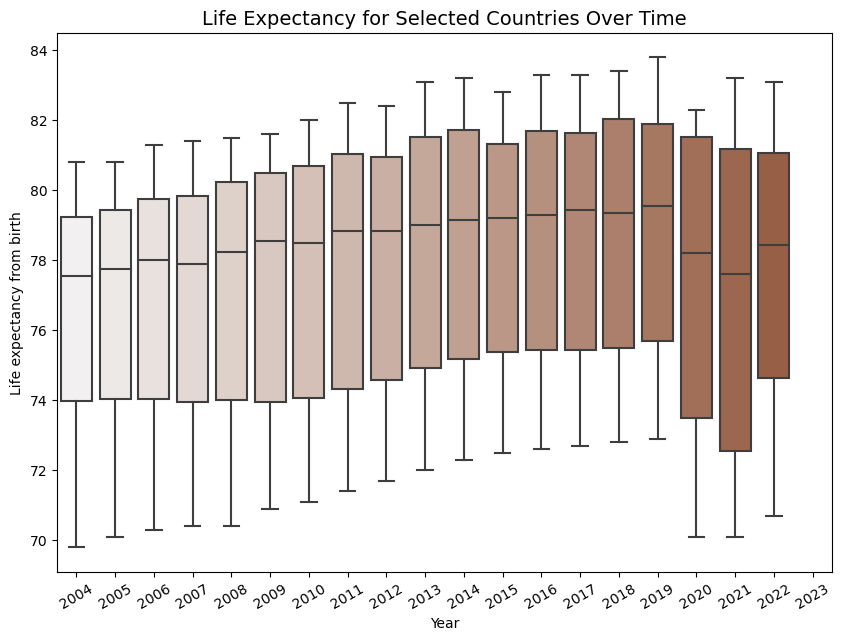

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 7))
color_map = sns.light_palette("sienna", n_colors=len(df_combined['year'].unique()))
sns.boxplot(x="year", y="life_exp", data=df_combined, palette=color_map)
plt.title("Life Expectancy for Selected Countries Over Time", size=14)
plt.xlabel("Year")
plt.xticks(rotation=30)
plt.ylabel("Life expectancy from birth")
plt.show()
plt.clf()

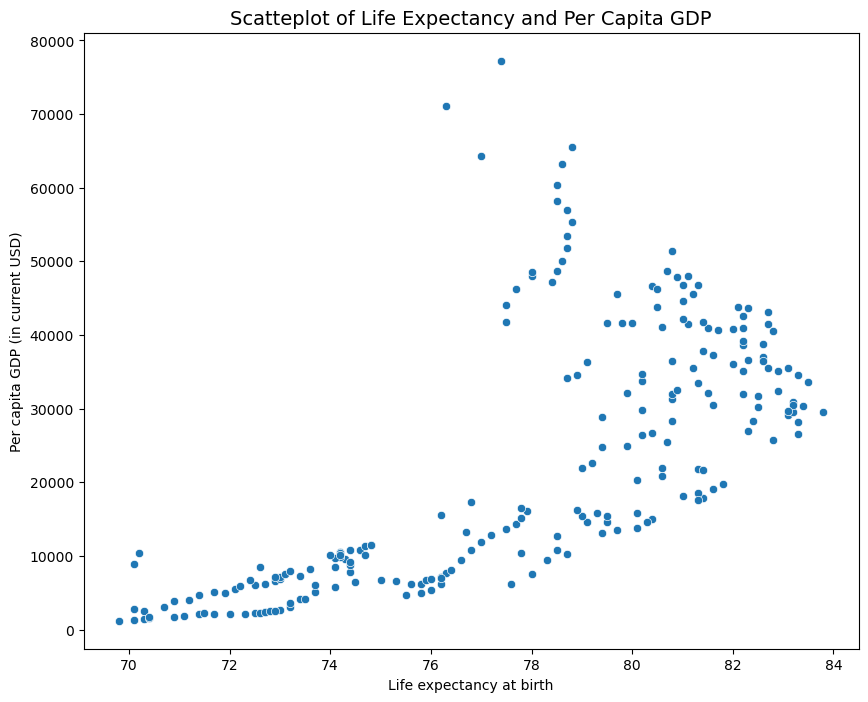

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="life_exp", y="gdp", data=df_combined)
plt.title("Scatteplot of Life Expectancy and Per Capita GDP", size=14)
plt.xlabel("Life expectancy at birth")
plt.ylabel("Per capita GDP (in current USD)")
plt.show()
plt.clf()

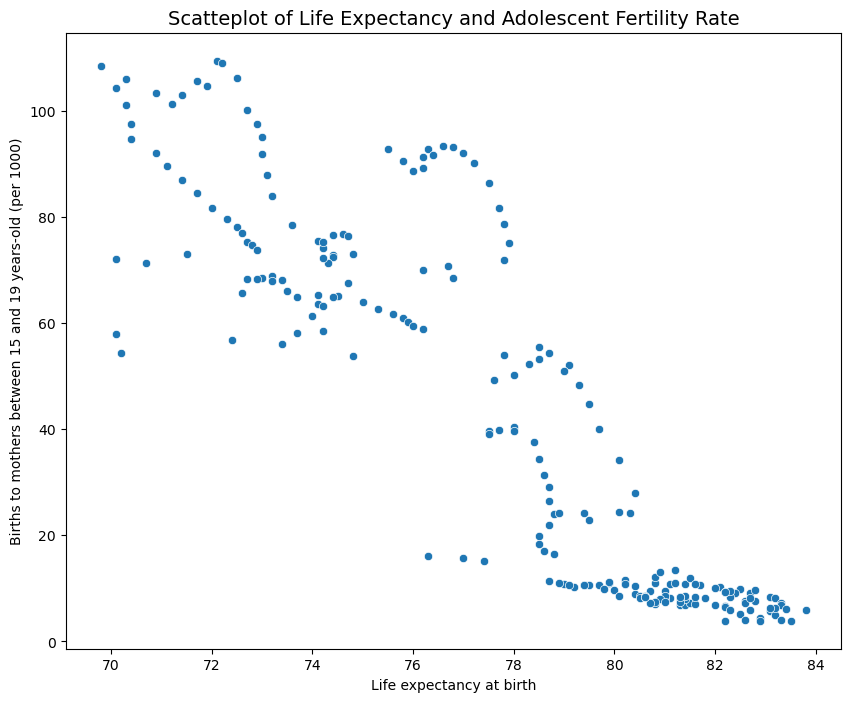

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="life_exp", y="fert_rate", data=df_combined)
plt.title("Scatteplot of Life Expectancy and Adolescent Fertility Rate", size=14)
plt.xlabel("Life expectancy at birth")
plt.ylabel("Births to mothers between 15 and 19 years-old (per 1000)")
plt.show()
plt.clf()

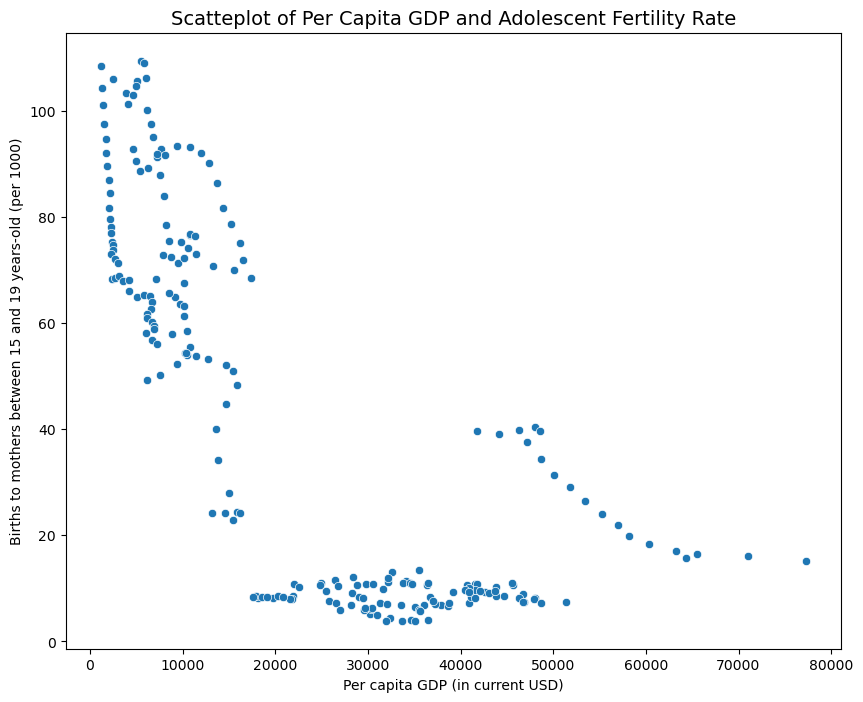

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="gdp", y="fert_rate", data=df_combined)
plt.title("Scatteplot of Per Capita GDP and Adolescent Fertility Rate", size=14)
plt.xlabel("Per capita GDP (in current USD)")
plt.ylabel("Births to mothers between 15 and 19 years-old (per 1000)")
plt.show()
plt.clf()

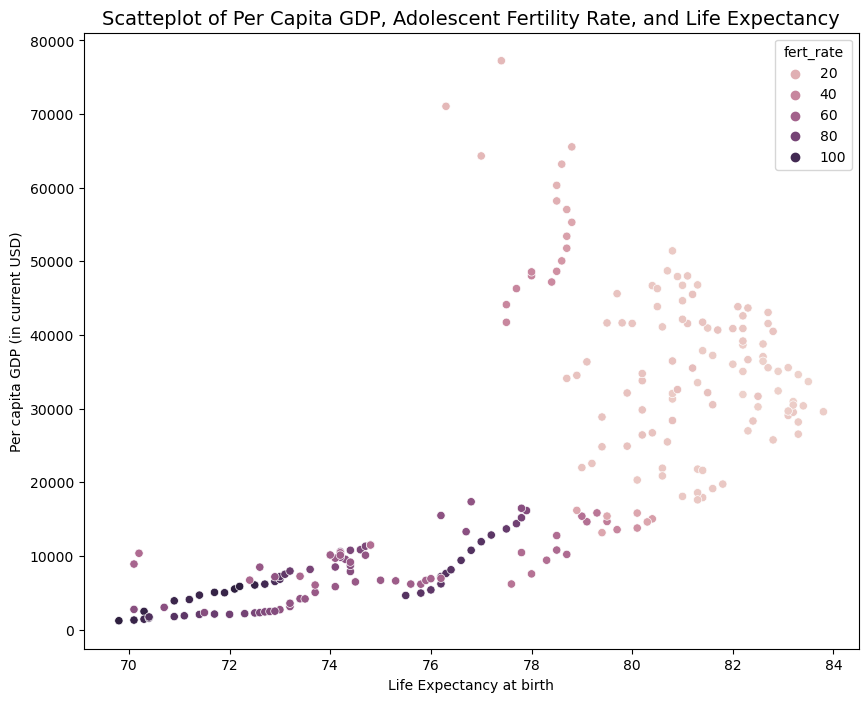

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="life_exp", y="gdp", hue="fert_rate", data=df_combined)
plt.title("Scatteplot of Per Capita GDP, Adolescent Fertility Rate, and Life Expectancy", size=14)
plt.xlabel("Life Expectancy at birth")
plt.ylabel("Per capita GDP (in current USD)")
plt.show()
plt.clf()

C:\Users\SRB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SRB\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


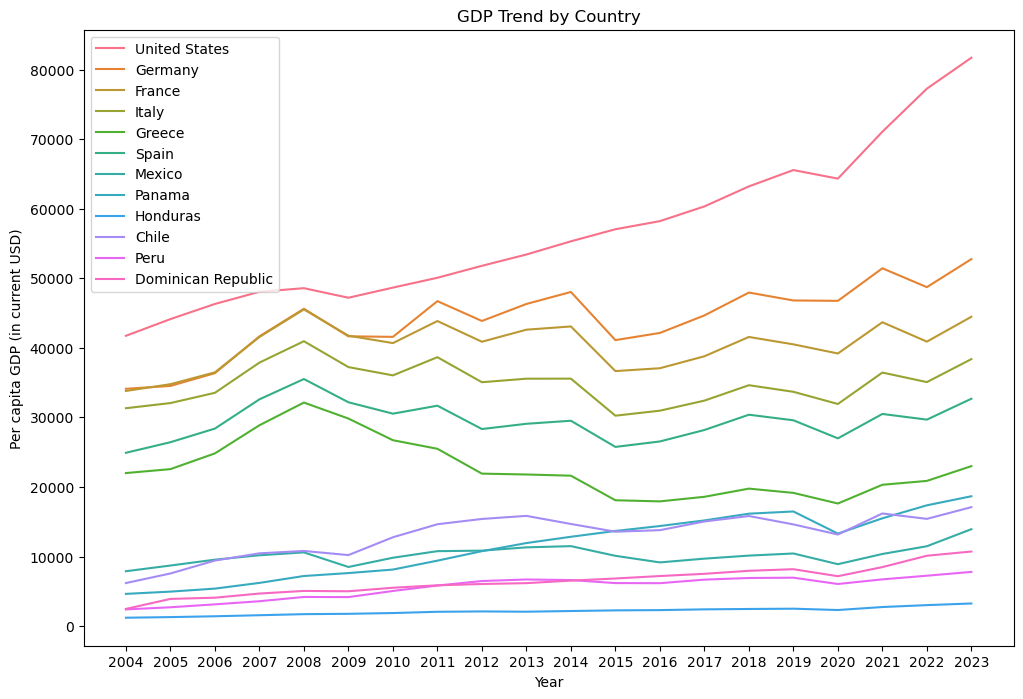

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(x="year", y="gdp", hue="country", data=df_combined)
plt.title("GDP Trend by Country")
plt.ylabel("Per capita GDP (in current USD)")
plt.xlabel("Year")
plt.legend()
plt.show()
plt.clf()

In [ ]:
## Let's look at the Latin American Countries only
## First we will need to create a list of these countries
lat_am = ["MEX", "PAN", "HND", "PER", "CHL", "DOM"]
